In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [2]:
# plot settings
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=23)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=16)          # controls default text sizes

# The Data

In [3]:
df_boston = pd.read_csv('Boston House Prices.csv')
df_boston

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


In [4]:
df_boston.describe()

,Rooms,Distance,Value
count,506.000000,506.000000,506.000000
mean,6.284634,3.795043,22.532806
std,0.702617,2.105710,9.197104
min,3.561000,1.129600,5.000000
25%,5.885500,2.100175,17.025000
50%,6.208500,3.207450,21.200000
75%,6.623500,5.188425,25.000000
max,8.780000,12.126500,50.000000


# Linear Regression with Statsmodels

## Simple Linear Regression

### Define the dependent and independent variable

In [5]:
y = df_boston['Value'] # dependent variable
x = df_boston['Rooms'] # independent variable

### Exploring the dataset

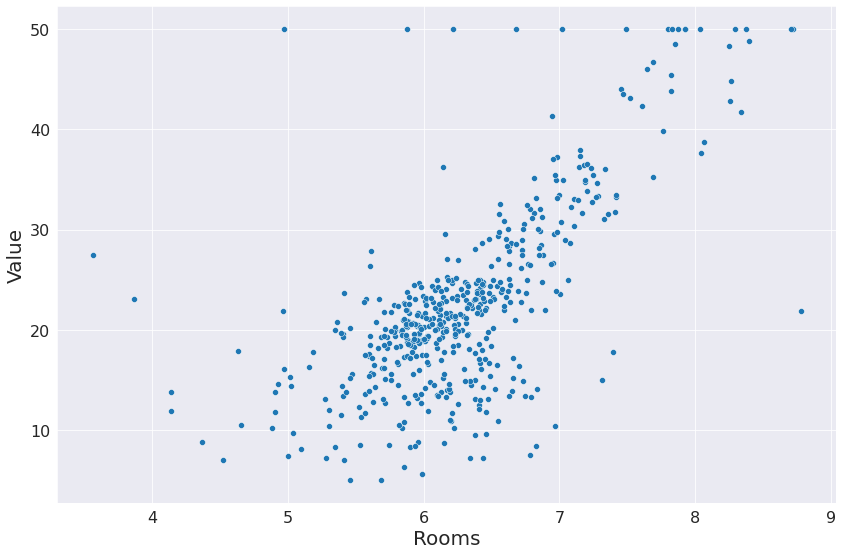

In [6]:
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x, y=y)
plt.show()

### Making the regression: Adding a constant and fitting the model

Statmodels doesn't add a constant by default, so we have to do it on our own

In [7]:
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model

In [8]:
lm.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

### The Regression Table

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.49e-74
Time:                        15:22:12   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS (Ordinary Least Squares): Most common method to estimate the linear regression (It finds the line that minimizes the sum of square error (SSE))

Table #1
- Dep. Variable: This is the dependent variable (in our example "Value" is our target value)
- R-squared: 1-(SSR/SST)
    1. Takes values from 0 to 1. R-squared values close to 0 correspond to a regression that explains none of the variability of the data, while values close to 1 correspond to a regression that explains the entire variability of the data. The r-squared obtained is telling us that the number of rooms explains 48.4% of the variability in house values.

Table #2

- Coef: Std error: Represents the accuracy of the prediction. The lower the standard error, the better prediction.
- Std error: The t scores and p-values are used for hypothesis test. The "Rooms" variable has a statistically significant p-value. Also, we can say at a 95% percent confidence level that the value of "Rooms" is between 8.279 to 9.925.

### Linear Regression Equation

In [10]:
# Rooms coef: 9.1021
# Constant coef: - 34.6706

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 9.1021*x['Rooms'] - 34.6706

### Plotting The Regression Line

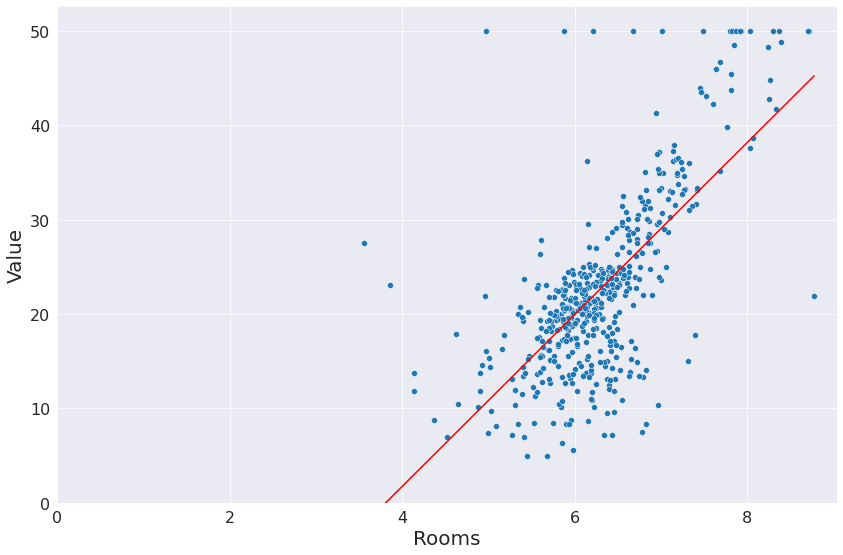

In [11]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y)

#plotting the line
sns.lineplot(x=x['Rooms'],y=y_pred, color='red')

#axes
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()

## Multiple linear regression

### Define the dependent and independent variable

In [12]:
y = df_boston['Value'] # dependent variable
X = df_boston[['Rooms', 'Distance']] # independent variable

### Making the regression: Adding a constant and fitting the model

In [13]:
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X).fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.84e-75
Time:                        15:22:14   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.000     -39.786     -29.486
Rooms          8.8014      0.424     20.780      0.000       7.969       9.634
Distance       0.4888      0.141      3.459      0.001       0.211       0.767
==============================================================================
Omnibus:                      142.807   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.520
Skew:                           1.090   Prob(JB):                    4.12e-184
Kurtosis:                       8.942   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression with Scikit-learn

## Define the dependent and independent variable

In [14]:
y = df_boston['Value'] # dependent variable
X = df_boston[['Rooms', 'Distance']] # independent variable

## Fitting the Model

In [15]:
lm = linear_model.LinearRegression() 
lm.fit(X, y) # fitting the model

LinearRegression()

## Predicting values

In [16]:
# lm.predict(X)
lm.predict(X)[:5]

array([25.23262311, 24.30597474, 31.03025338, 29.9197274 , 31.23113776])

## Regression Table

In [17]:
# r2 score
lm.score(X, y)

0.4955246476058477

In [18]:
lm.coef_

array([8.80141183, 0.48884854])

In [19]:
lm.intercept_

-34.63605017547333